# Ensemble methods demo

In [1]:
import numpy as np

from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
from matplotlib import colors

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier

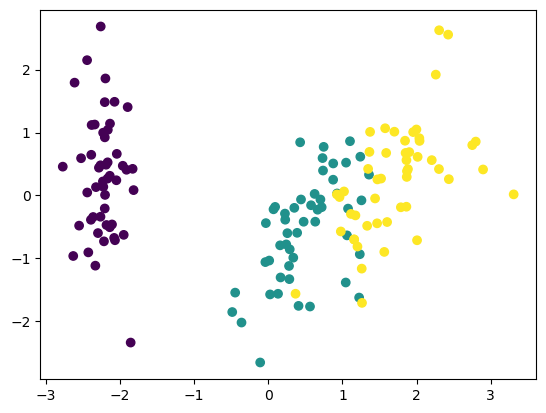

In [2]:
# load iris

iris = datasets.load_iris()

X = iris.data
y = iris.target

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.scatter(x=X_pca[:,0], y=X_pca[:,1], c=y);   # plot the data

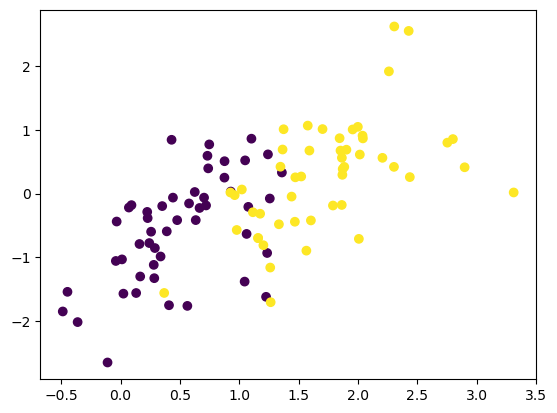

In [3]:
# choose the two overlapping classes

X_pca_12 = X_pca[y>0,:]
y_12 = y[y>0]

plt.scatter(x=X_pca_12[:,0], y=X_pca_12[:,1], c=y_12);   # plot the data

In [4]:
# apply bagging (or random forest)

tree = DecisionTreeClassifier(min_samples_leaf=7) #min_samples_split=11

ens_model = BaggingClassifier(estimator=tree, n_estimators=1, 
                                  bootstrap=True,
                                  bootstrap_features=False,   # change to True for Random Forest
                                  oob_score=False,                    # oob_score default = False 
                                  random_state=0).fit(X_pca_12, y_12)

#print('oob score =', ens_model.oob_score_)

pred_12 = ens_model.predict(X_pca_12)

confusion_matrix(y_12,pred_12)

array([[45,  5],
       [ 5, 45]])

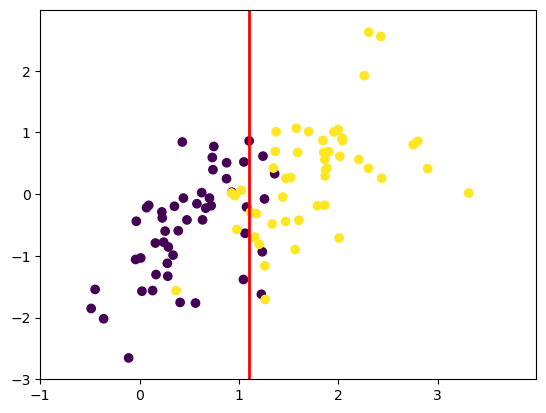

In [5]:
# visualize the emsemble classifier

xx, yy = np.mgrid[-1:4:.01, -3:3:.01]
grid = np.c_[xx.ravel(), yy.ravel()]

Z_ens = ens_model.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z_ens = Z_ens[:, 1].reshape(xx.shape)

plt.scatter(x=X_pca_12[:,0], y=X_pca_12[:,1], c=y_12);   # plot the data

plt.contour(xx, yy, Z_ens, [0.5], linewidths=2.0, colors="red")  # LDA


In [6]:
# adaBoost

ens_model = AdaBoostClassifier(estimator=tree, n_estimators=1, random_state=0).fit(X_pca_12, y_12)

pred_12 = ens_model.predict(X_pca_12)

confusion_matrix(y_12,pred_12)

array([[45,  5],
       [ 5, 45]])

In [7]:
# all three classes

ens_model = BaggingClassifier(estimator=tree, n_estimators=100, 
                                  bootstrap=True,
                                  bootstrap_features=True,     # RF
                                  oob_score=True,                     
                                  random_state=0).fit(X_pca, y)

print('oob score =', ens_model.oob_score_)

pred = ens_model.predict(X_pca)

confusion_matrix(y,pred)

oob score = 0.9


array([[50,  0,  0],
       [ 0, 45,  5],
       [ 0,  6, 44]])

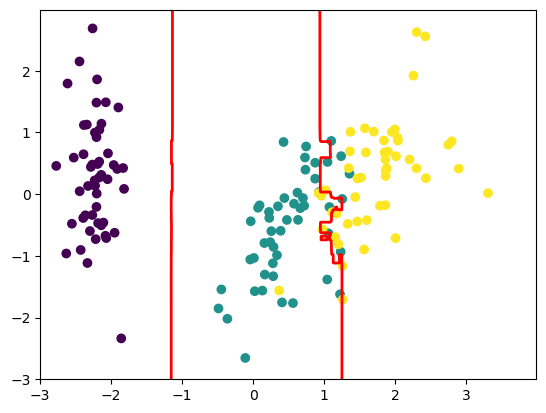

In [8]:
xx, yy = np.mgrid[-3:4:.01, -3:3:.01]
grid = np.c_[xx.ravel(), yy.ravel()]

Z_ens = ens_model.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z_ens = Z_ens[:, 1].reshape(xx.shape)

plt.scatter(x=X_pca[:,0], y=X_pca[:,1], c=y);   # plot the data

plt.contour(xx, yy, Z_ens, [0.5], linewidths=2.0, colors="red")  # LDA